# Model Training, Testing and Hyperparameters Tuning

## How to select a right kind of Machine Learning Aalgorithms for a given task

Well, there is no straightforward and sure-shot answer to this question. The answer depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data, to name a few.

1. Size of the training data
It is usually recommended to gather a good amount of data to get reliable predictions. However, many a time, the availability of data is a constraint. So, if the training data is smaller or if the dataset has a fewer number of observations and a higher number of features like genetics or textual data, choose algorithms with high bias/low variance like Linear regression, Naïve Bayes, or Linear SVM.

If the training data is sufficiently large and the number of observations is higher as compared to the number of features, one can go for low bias/high variance algorithms like KNN, Decision trees, or kernel SVM.


2. Accuracy and/or Interpretability of the output
Accuracy of a model means that the function predicts a response value for a given observation, which is close to the true response value for that observation. A highly interpretable algorithm (restrictive models like Linear Regression) means that one can easily understand how any individual predictor is associated with the response while the flexible models give higher accuracy at the cost of low interpretability.


3. Speed or Training time
Higher accuracy typically means higher training time. Also, algorithms require more time to train on large training data. In real-world applications, the choice of algorithm is driven by these two factors predominantly.

Algorithms like Naïve Bayes and Linear and Logistic regression are easy to implement and quick to run. Algorithms like SVM, which involve tuning of parameters, Neural networks with high convergence time, and random forests, need a lot of time to train the data.


4. Linearity
Many algorithms work on the assumption that classes can be separated by a straight line (or its higher-dimensional analog). Examples include logistic regression and support vector machines. Linear regression algorithms assume that data trends follow a straight line. If the data is linear, then these algorithms perform quite good.

However, not always is the data is linear, so we require other algorithms which can handle high dimensional and complex data structures. Examples include kernel SVM, random forest, neural nets.

The best way to find out the linearity is to either fit a linear line or run a logistic regression or SVM and check for residual errors. A higher error means the data is not linear and would need complex algorithms to fit.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
train_data = pd.read_csv('Arya_DataScientist_Assignment/training_set.csv')
test_data = pd.read_csv('Arya_DataScientist_Assignment/test_set.csv')

In [3]:
train_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [4]:
test_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [5]:
train_data.drop(train_data.columns[train_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_data.drop(test_data.columns[test_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [6]:
train = train_data.drop(['X32', 'Y'], axis=1).copy()
test = test_data.drop(['X32'], axis=1).copy()
labels = train_data['Y'].copy()

In [7]:
### Since the features values varying, we need to standerdize the data before feeding it to the model
scaler = StandardScaler().fit(train)
scaled_train = scaler.transform(train)

In [8]:
scaled_train.shape

(3910, 56)

In [9]:
scaled_test = scaler.transform(test)

In [10]:
scaled_test.shape

(691, 56)

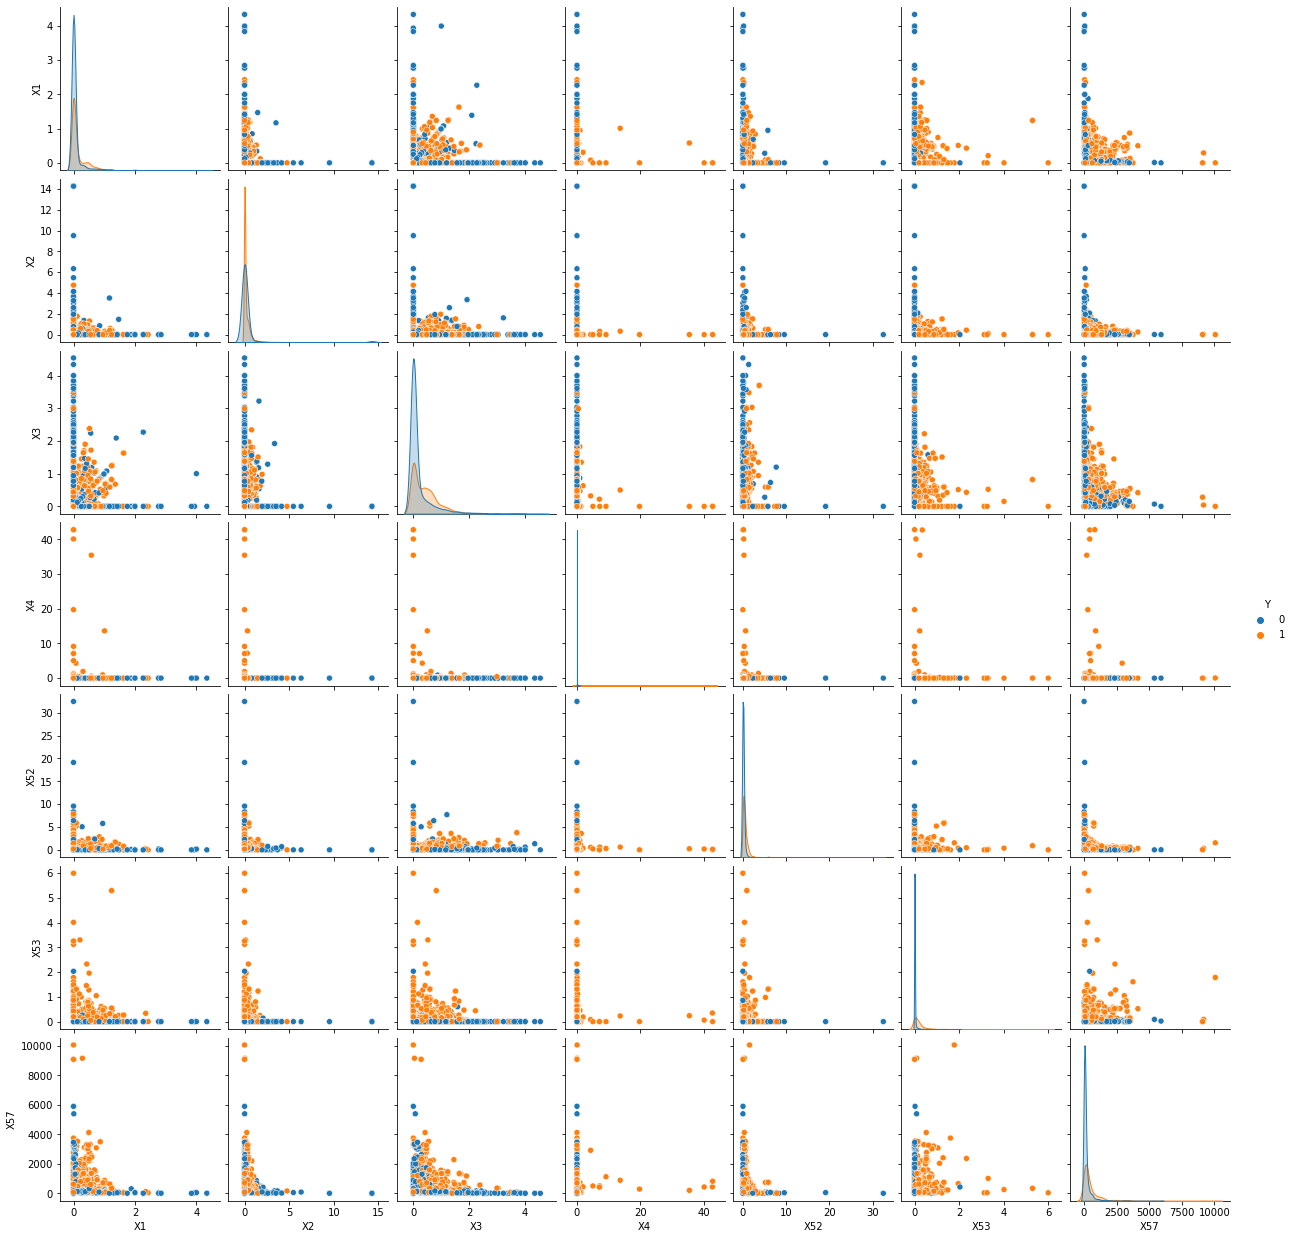

In [11]:
sns.pairplot(train_data[['X1','X2','X3','X4','X52','X53','X57','Y']], hue='Y')

### Dataset Description

### Splitting the data into 4:1 train-validation set

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(scaled_train, labels, test_size=0.2, random_state=42)

## K-nearest neighbor classifier

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
predicted = knn_classifier.predict(X_val)

In [17]:
pred_on_test = knn_classifier.predict(scaled_test)

#### Let's predict our model prediction on test data

In [18]:
pred_on_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,

#### Plot confusion Matrix

<AxesSubplot:>

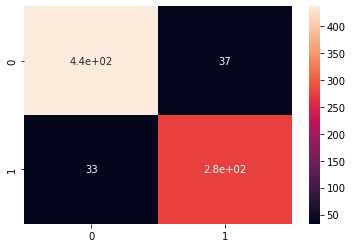

In [19]:
conf_mat = confusion_matrix(Y_val, predicted)
sns.heatmap(conf_mat, annot=True)

#### Plot ROC Curve

In [20]:
val_prob = knn_classifier.predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(Y_val, val_prob[:,1])

In [21]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.figure(figsize=(12,8))
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.title('ROC AUC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')

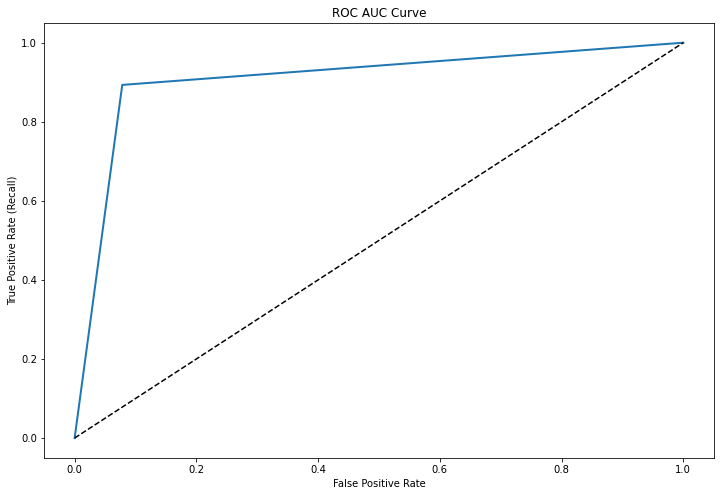

In [22]:
plot_roc_curve(fpr, tpr, label=None)

In [23]:
from prettytable import PrettyTable
def generate_metrics(model, X_train, Y_train, X_val, Y_val):
    ## calculate predicted values on validation set
    predicted = model.predict(X_val)
    
    ## accuracy score
    score = model.score(X_val, Y_val)
    
    ## Mean of cross validation score
    mean_cross_score = cross_val_score(model, X_val, Y_val, cv=10, scoring="accuracy").mean()
    
    ## Precision Score
    prec_score = precision_score(Y_val, predicted)
    
    ## Recall Score
    rec_score = recall_score(Y_val, predicted)
    
    ## f1_score
    fone_score = f1_score(Y_val, predicted)
    
    ## predict probabilities
    val_prob = model.predict_proba(X_val)
    
    ## roc_auc score based on positive labels
    rocauc_score = roc_auc_score(Y_val, val_prob[:,1])
    
    metricstable = PrettyTable()
    
    metricstable.field_names = ["Accuracy Measures", "Values"]
    
    metricstable.add_row(["Accuracy Score", score])
    metricstable.add_row(["Mean Cross Validation Score", mean_cross_score])
    metricstable.add_row(["Precision Score", prec_score])
    metricstable.add_row(["Recall Score", rec_score])
    metricstable.add_row(["F1 Score", fone_score])
    metricstable.add_row(["ROC AUC Score", rocauc_score])
    
    ## Display table
    print(metricstable)

    

#### Print accuracy measure for simple KNN model

In [24]:
generate_metrics(knn_classifier, X_train, Y_train, X_val, Y_val)

+-----------------------------+--------------------+
|      Accuracy Measures      |       Values       |
+-----------------------------+--------------------+
|        Accuracy Score       | 0.9104859335038363 |
| Mean Cross Validation Score | 0.8773287893541057 |
|       Precision Score       | 0.8817891373801917 |
|         Recall Score        | 0.8932038834951457 |
|           F1 Score          | 0.8874598070739551 |
|        ROC AUC Score        | 0.9074898910076151 |
+-----------------------------+--------------------+


### Using Elbow method to calculate optimun value for "K"

In [25]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    accuracy_rate.append(scores.mean())

In [26]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != Y_val))

Text(0, 0.5, 'Accuracy Rate')

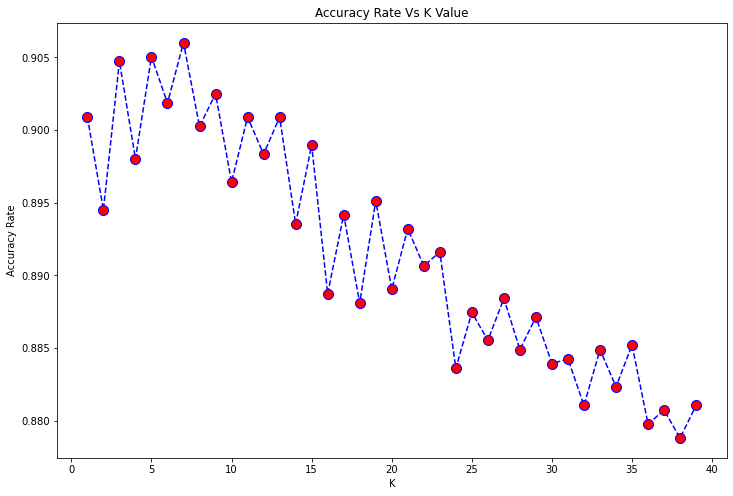

In [27]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), accuracy_rate, color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

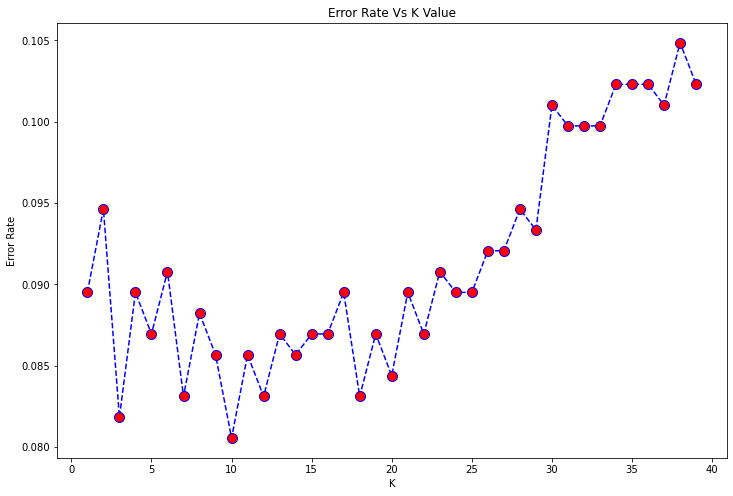

In [28]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), error_rate, color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### From the accuracy vs K and Error vs K plot, we arrive at k = 10 is the optimum value for K, because after k=10, error is sharply increasing and thus accuracy is decreasing.

#### Let's train our KNN algorithm with optimum k=10, and print all accuacy metrics

In [29]:
knn_optimum = KNeighborsClassifier(n_neighbors=10)

In [30]:
knn_optimum.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
predicted = knn_optimum.predict(X_val)

#### Let's predict on test dataset

In [43]:
pred_on_test = knn_optimum.predict(scaled_test)

In [44]:
pred_on_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

<AxesSubplot:>

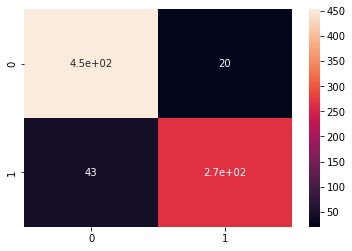

In [33]:
conf_mat = confusion_matrix(Y_val, predicted)
sns.heatmap(conf_mat, annot=True)

In [34]:
val_prob = knn_optimum.predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(Y_val, val_prob[:,1])

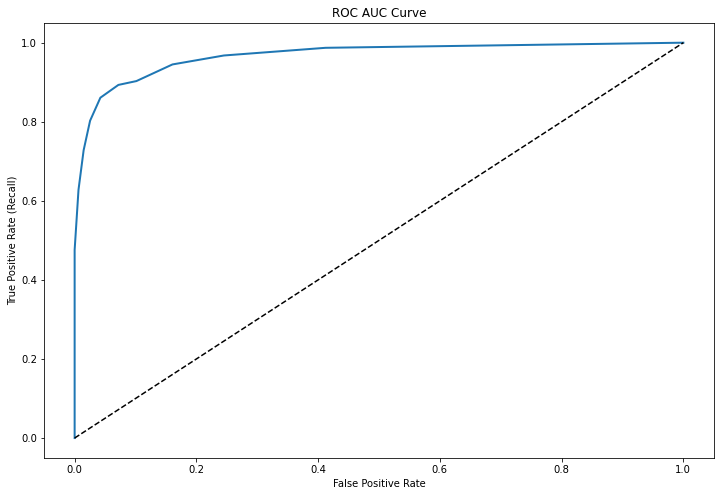

In [35]:
plot_roc_curve(fpr, tpr, label=None)

#### Now let's print accuracy measures for optimum KNN with k = 10

In [36]:
generate_metrics(knn_optimum, X_train, Y_train, X_val, Y_val)

+-----------------------------+--------------------+
|      Accuracy Measures      |       Values       |
+-----------------------------+--------------------+
|        Accuracy Score       | 0.9194373401534527 |
| Mean Cross Validation Score | 0.8784810126582279 |
|       Precision Score       | 0.9300699300699301 |
|         Recall Score        |  0.86084142394822  |
|           F1 Score          | 0.8941176470588236 |
|        ROC AUC Score        | 0.9666659824709046 |
+-----------------------------+--------------------+


## Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

### Going with simple random forest classifier approach

<AxesSubplot:>

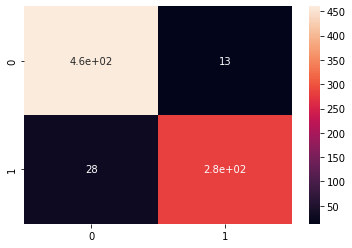

In [38]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)

## predict on validation set
predicted = rf_classifier.predict(X_val)

## print confusion matrix
conf_mat = confusion_matrix(Y_val, predicted)
sns.heatmap(conf_mat, annot=True)

#### Predict on test dataset

In [45]:
pred_on_test = rf_classifier.predict(scaled_test)

In [46]:
pred_on_test

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

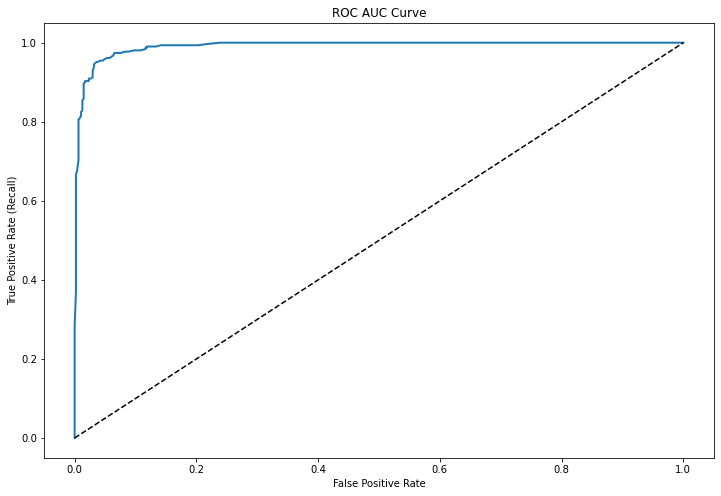

In [47]:
## plot roc curve
val_prob = rf_classifier.predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(Y_val, val_prob[:,1])

plot_roc_curve(fpr, tpr, label=None)

In [48]:
## generate accuaracy measures
generate_metrics(rf_classifier, X_train, Y_train, X_val, Y_val)

+-----------------------------+--------------------+
|      Accuracy Measures      |       Values       |
+-----------------------------+--------------------+
|        Accuracy Score       | 0.9475703324808185 |
| Mean Cross Validation Score | 0.9309802012333659 |
|       Precision Score       |  0.95578231292517  |
|         Recall Score        | 0.9093851132686084 |
|           F1 Score          | 0.9320066334991707 |
|        ROC AUC Score        | 0.9909344061522883 |
+-----------------------------+--------------------+


## XGBoost Classifier

In [49]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier

In [50]:
xgb_classifier = XGBClassifier(eval_metric='error')

xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:>

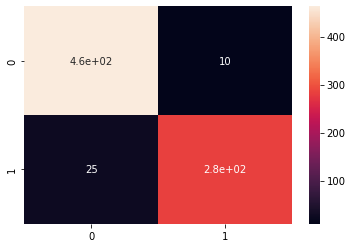

In [51]:
## predict on validation set
predicted = xgb_classifier.predict(X_val)

## print confusion matrix
conf_mat = confusion_matrix(Y_val, predicted)
sns.heatmap(conf_mat, annot=True)

#### Predict on test dataset

In [52]:
pred_on_test = xgb_classifier.predict(scaled_test)

In [53]:
pred_on_test

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

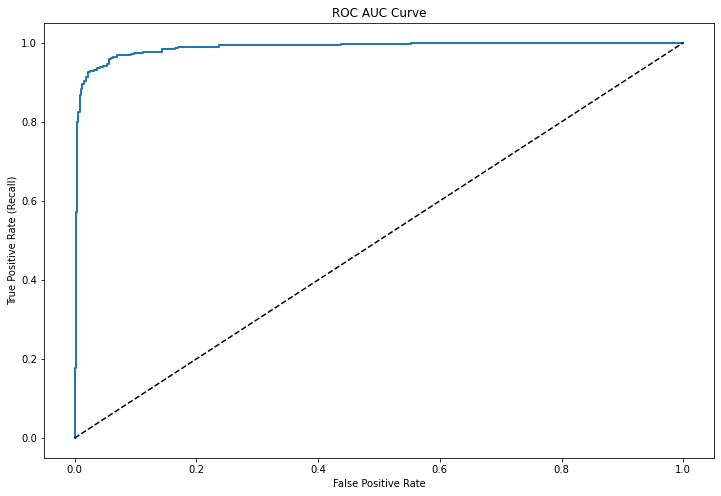

In [54]:
## plot roc curve
val_prob = xgb_classifier.predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(Y_val, val_prob[:,1])

plot_roc_curve(fpr, tpr, label=None)

In [55]:
## generate accuaracy measures
generate_metrics(xgb_classifier, X_train, Y_train, X_val, Y_val)

+-----------------------------+--------------------+
|      Accuracy Measures      |       Values       |
+-----------------------------+--------------------+
|        Accuracy Score       | 0.9552429667519181 |
| Mean Cross Validation Score | 0.9271827328789355 |
|       Precision Score       | 0.9659863945578231 |
|         Recall Score        | 0.919093851132686  |
|           F1 Score          | 0.9419568822553896 |
|        ROC AUC Score        | 0.9877186860704585 |
+-----------------------------+--------------------+
